<a href="https://colab.research.google.com/github/kirnapure/hotel-booking-analysis/blob/main/Trinity_AVI_%2Chotel_booking_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hotel Booking Analysis
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Explore and analyze the data to discover important factors that govern the bookings.


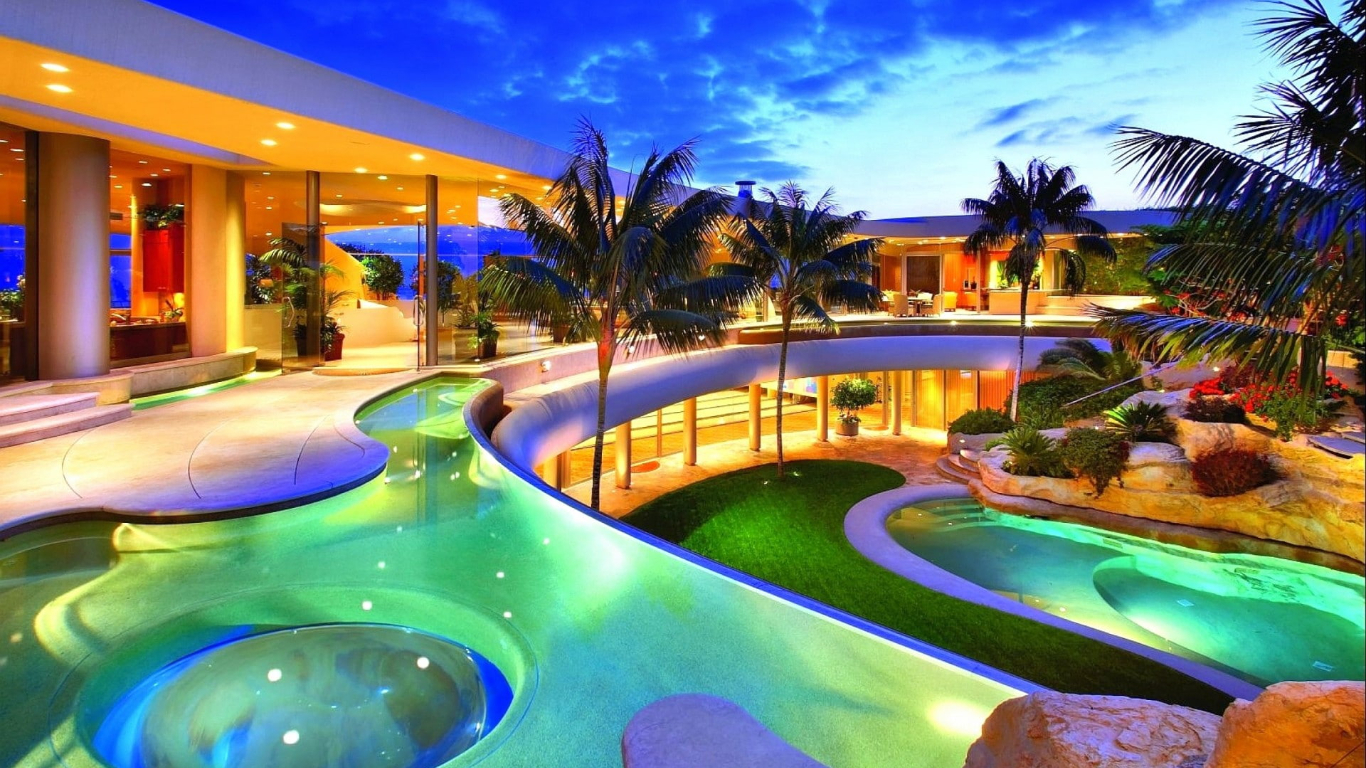

## **Introduction**

Have you ever wondered about the what are most popular months, ratio of booking and cancellations,

# **Methodology**

In this project, We used Python's most useful libraries like Pandas, Matplotlib, Seaborn etc. to examine, cleaning and to analyse the “Hotel Booking Analysis” dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# load the csv file
df = pd.read_csv(r'/content/sample_data/Hotel Bookings (1).csv')

In [16]:
# before cleaning the data total number of rows and columns in data
print(f"We have total {df.shape[0]} rows and {df.shape[1]} columns")

We have total 14684 rows and 32 columns


In [18]:
# cheaking first 5 rows in data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-07-03


In [19]:
# cheaking first 20 rows in data
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.00,0.0,0.0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.00,0.0,0.0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.00,0.0,1.0,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2.0,...,No Deposit,NaN,NaN,0.0,Transient,107.00,0.0,0.0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2.0,...,No Deposit,303.0,NaN,0.0,Transient,103.00,0.0,1.0,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2.0,...,No Deposit,240.0,NaN,0.0,Transient,82.00,0.0,1.0,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2.0,...,No Deposit,15.0,NaN,0.0,Transient,105.50,0.0,0.0,Canceled,2015-04-22


In [20]:
# cheaking last 15 row data
df.tail(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14669,Resort Hotel,0,0,2017,May,20,15,1,0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,47.00,0.0,0.0,Check-Out,2017-05-16
14670,Resort Hotel,0,0,2016,February,6,4,0,1,1.0,...,No Deposit,NaN,NaN,0.0,Transient,39.00,0.0,0.0,Check-Out,2016-02-05
14671,Resort Hotel,0,3,2016,April,14,1,0,1,1.0,...,No Deposit,NaN,225.0,0.0,Transient,45.00,0.0,0.0,Check-Out,2016-04-02
14672,Resort Hotel,0,10,2016,October,44,29,1,1,2.0,...,No Deposit,NaN,NaN,0.0,Transient,38.00,0.0,2.0,Check-Out,2016-10-31
14673,Resort Hotel,0,154,2015,October,44,30,1,2,2.0,...,No Deposit,NaN,NaN,0.0,Transient,36.00,0.0,0.0,Check-Out,2015-11-02
14674,Resort Hotel,0,17,2016,October,44,28,2,2,2.0,...,No Deposit,NaN,NaN,0.0,Transient,38.00,0.0,0.0,Check-Out,2016-11-01
14675,Resort Hotel,0,1,2017,January,3,19,0,1,1.0,...,No Deposit,NaN,165.0,0.0,Transient,35.00,0.0,0.0,Check-Out,2017-01-20
14676,Resort Hotel,0,0,2015,October,44,26,1,0,1.0,...,No Deposit,NaN,329.0,0.0,Transient,35.10,1.0,0.0,Check-Out,2015-10-27
14677,Resort Hotel,0,0,2015,November,48,26,0,1,1.0,...,No Deposit,NaN,329.0,0.0,Transient,38.00,1.0,0.0,Check-Out,2015-11-27
14678,Resort Hotel,0,0,2016,November,48,24,0,1,1.0,...,No Deposit,NaN,329.0,0.0,Transient,44.00,0.0,1.0,Check-Out,2016-11-25


## **Dataset**
This dataset contains information on records for client stays at hotels. More specifically, it contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the guest arecoming for first time, number of days in waiting list, among other things. For the purpose of this post, We only focused on some of these variables to examine.


In [22]:
# cheaking the basic information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14684 entries, 0 to 14683
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           14684 non-null  object 
 1   is_canceled                     14684 non-null  int64  
 2   lead_time                       14684 non-null  int64  
 3   arrival_date_year               14684 non-null  int64  
 4   arrival_date_month              14684 non-null  object 
 5   arrival_date_week_number        14684 non-null  int64  
 6   arrival_date_day_of_month       14684 non-null  int64  
 7   stays_in_weekend_nights         14684 non-null  int64  
 8   stays_in_week_nights            14684 non-null  int64  
 9   adults                          14683 non-null  float64
 10  children                        14683 non-null  float64
 11  babies                          14683 non-null  float64
 12  meal                            